## 2. 케라스의 texts_to_matrix() 이해하기

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
#keras의 전처리 도구인 Tokenizer를 임포트

In [0]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [0]:
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


- texts_to_matrix() : 입력된 텍스트 데이터로부터 행렬를 만드는 도구
  - 총 4개의 모드 지원 : 'binary','count', 'freq','tfidf'

- 'count' 모드를 사용했을 경우
  - 사용 시 : 문서 단어 행렬(DTM)을 생성함
  - DTM에서의 인덱스는 앞서 확인한 word_index의 결과
  - 주의할 점
    - 각 단어에 부여되는 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터 시작
  - DTM은 bag of words를 기반으로 하므로 단어 순서 정보는 보존되지 않음
  - 4개의 모든 모두에서 단어 순서 정보는 보존되지 않음

In [0]:
print(t.texts_to_matrix(texts, mode = 'count')) 
# texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


- binary 모드의 경우 해당 단어가 존재하는지만 관심을 가지고 해당 단어가 몇 개였는지는 무시함
  - 해당 단어가 존재하면 1, 단어가 존재하지 않으면 0의 값을 가짐
  - 단어의 존재 유무로만 행렬을 표현

In [0]:
print(t.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


- tfidf 모드는 TF-IDF 행렬을 만듦
  - 기본식이나 사이킷런의 TfidVectorizer에서 사용하는 식이랑 다름
  

In [0]:
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2)) 
# 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


- freq 모드는 각 문서에서의 각 단어의 등장 횟수를 분자로 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총합)를 분모로 하는 표현 방법

In [0]:
print(t.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


## 3. 20개 뉴스 그룹 데이터에 대한 이해
- 사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공

In [0]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

- subset의 값 
  - 'all'을 넣으면 전체 데이터의 샘플을 다운로드
  - 'train'을 넣으면 훈련 데이터 다운로드
  - 'test'를 넣으면 테스트 데이터 다운로드


In [0]:
newsdata = fetch_20newsgroups(subset = 'train') 
# 'train'을 기재하면 훈련 데이터만 리턴한다.

In [0]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [0]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [0]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


- 이번 챕터 실습의 목적 : 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것

In [0]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [0]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [0]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [0]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5] # 상위 5개 행을 출력

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
email     11314 non-null object
target    11314 non-null int64
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [0]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
#nunique() : 유니크한 value의 개수를 나타냄
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


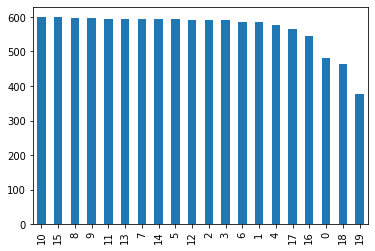

In [0]:
data['target'].value_counts().plot(kind='bar')

In [0]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [0]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [0]:
len(train_label.unique())

20

In [0]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [0]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [0]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [0]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [0]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


## 4. 다층 퍼셉트론(Multilayer Preceptron)을 사용하여 텍스트 분류하기

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [0]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [0]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 2s 242us/sample - loss: 2.3293 - acc: 0.3198 - val_loss: 0.9524 - val_acc: 0.8092
Epoch 2/5
10182/10182 [==============================] - 1s 99us/sample - loss: 0.8625 - acc: 0.7692 - val_loss: 0.4574 - val_acc: 0.8799
Epoch 3/5
10182/10182 [==============================] - 1s 99us/sample - loss: 0.4346 - acc: 0.8857 - val_loss: 0.3378 - val_acc: 0.9019
Epoch 4/5
10182/10182 [==============================] - 1s 96us/sample - loss: 0.2568 - acc: 0.9367 - val_loss: 0.2993 - val_acc: 0.9134
Epoch 5/5
10182/10182 [==============================] - 1s 98us/sample - loss: 0.1772 - acc: 0.9548 - val_loss: 0.3038 - val_acc: 0.9099
binary 모드의 테스트 정확도: 0.8296601
Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 1s 104us/sample - loss: 2.7909 - acc: 0.226

|모드의 테스트 정확도|Accuracy|
|--------------------|--------|
|binary|0.8296601|
|count|0.8195698|
|tfidf|0.8316516|
|freq|0.6950345| 

# 번외편 1. tensorflow(1.xx 버전)로 다층 퍼셉트론으로 텍스트 분류하기

In [3]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np

In [4]:
newsdata = fetch_20newsgroups(subset = 'train') 
# 'train'을 기재하면 훈련 데이터만 리턴한다.

In [5]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5] # 상위 5개 행을 출력

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [0]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [0]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [0]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [0]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [0]:
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,max_words))
Y=tf.placeholder(tf.float32,shape=(None,20))
training = tf.placeholder_with_default(False, shape=(), name='training')
dropout_rate = 0.5  # == 1 - keep_prob
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, 256, activation='relu', name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    hidden2 = tf.layers.dense(hidden1, 128, activation='relu', name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    logits = tf.layers.dense(hidden2, 20, name="outputs")

with tf.name_scope("loss"):
    cost = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits)
    loss = tf.reduce_mean(cost, name="loss")

learning_rate = 0.001

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    prediction = tf.argmax(logits, 1)
    correct = tf.equal(prediction, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

prediction = tf.argmax(cost, 1)
init = tf.global_variables_initializer()
n_epochs = 5
batch_size = 128

In [0]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [22]:
with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, Y: y_batch})
        if epoch % 1 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, Y: y_batch})
            print(epoch, "배치 데이터 정확도:", acc_batch)
             # Let's see if we can predict
    Z=logits.eval(feed_dict={X:X_test})
    y_pred = np.argmax(Z, axis=1)
    print('binary 모드의 테스트 예측값: {0}'.format(y_pred))
    print('binary 모드의 테스트 정확도:',sess.run(accuracy,feed_dict={X:X_test,Y:y_test}))

0 배치 데이터 정확도: 0.9296875
1 배치 데이터 정확도: 0.953125
2 배치 데이터 정확도: 0.984375
3 배치 데이터 정확도: 1.0
4 배치 데이터 정확도: 1.0
binary 모드의 테스트 예측값: [ 4  1  0 ...  9 12 15]
binary 모드의 테스트 정확도: 0.8163834


In [23]:
modes = ['binary', 'count', 'tfidf', 'freq']
with tf.Session() as sess:
    init.run()
    for mode in modes:
      X_train, X_test, _ = prepare_data(train_email, test_email, mode)
      for epoch in range(n_epochs):
          for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
              sess.run(training_op, feed_dict={X: X_batch, Y: y_batch})
          if epoch % 1 == 0:
              acc_batch = accuracy.eval(feed_dict={X: X_batch, Y: y_batch})
              print(epoch, "배치 데이터 정확도:", acc_batch)
              # Let's see if we can predict
      Z=logits.eval(feed_dict={X:X_test})
      y_pred = np.argmax(Z, axis=1)
      print(mode,'모드의 테스트 정확도:',sess.run(accuracy,feed_dict={X:X_test,Y:y_test}))

0 배치 데이터 정확도: 0.90625
1 배치 데이터 정확도: 0.96875
2 배치 데이터 정확도: 0.9765625
3 배치 데이터 정확도: 1.0
4 배치 데이터 정확도: 1.0
binary 모드의 테스트 정확도: 0.81996816
0 배치 데이터 정확도: 0.96875
1 배치 데이터 정확도: 1.0
2 배치 데이터 정확도: 1.0
3 배치 데이터 정확도: 1.0
4 배치 데이터 정확도: 1.0
count 모드의 테스트 정확도: 0.8017791
0 배치 데이터 정확도: 1.0
1 배치 데이터 정확도: 1.0
2 배치 데이터 정확도: 1.0
3 배치 데이터 정확도: 0.9921875
4 배치 데이터 정확도: 0.9921875
tfidf 모드의 테스트 정확도: 0.8142592
0 배치 데이터 정확도: 0.6015625
1 배치 데이터 정확도: 0.8828125
2 배치 데이터 정확도: 0.7734375
3 배치 데이터 정확도: 0.8671875
4 배치 데이터 정확도: 0.875
freq 모드의 테스트 정확도: 0.6626394
